<a href="https://colab.research.google.com/github/Alzategelizabeth/Cartografia-/blob/main/Taller%208/M%C3%A9todos_basdosendatos_Multivariados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##**Variables**


(821560,)

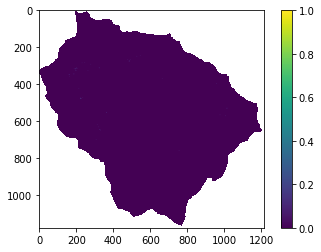

In [3]:
#INVENTARIO
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/InventarioMenM.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>1,np.nan,inventario)#np.where--cambia los valores menores a 0
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)] # para eliminar  del vector los datos No data y dejar solo los que tienen datos en la cuenca
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

(821560,)

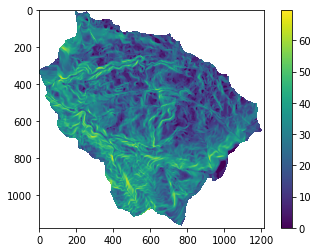

In [4]:
#PENDIENTE
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente2.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape

(821560,)

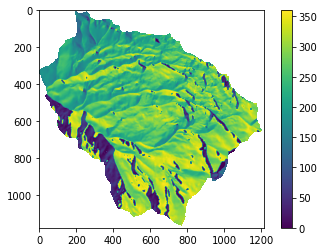

In [5]:
#ASPECTO
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-2,np.nan,aspecto)
aspecto=np.where(aspecto<0,0,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

(821560,)

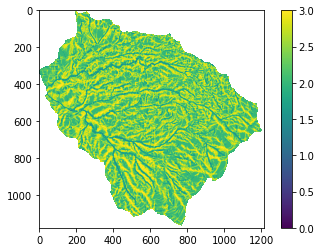

In [6]:
#CURVATURA
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/curvaturasumppointoraster.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura>3,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
np.unique(curvatura_vector_MenM)
curvatura_vector_MenM.shape

(821560,)

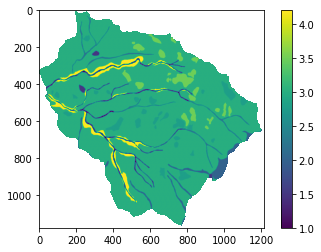

In [7]:
#GEOMORFOLOGÍA
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/subunidades.tif?raw=true')
geomorfologia=raster.read(1)
geomorfologia=np.where(geomorfologia<1,np.nan,geomorfologia)
geomorfologia_vector=geomorfologia.ravel()
geomorfologia_vector_MenM=geomorfologia_vector[~np.isnan(geomorfologia_vector)]
plt.imshow(geomorfologia)
plt.colorbar()
geomorfologia_vector_MenM.shape

##**Método LR**




In [8]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM,'geomorfologia':geomorfologia_vector_MenM, 'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
df.head()

,inventario,pendiente,aspecto,geomorfologia,curvatura
0,0.0,35.672390,138.732468,3.0,0.0
1,0.0,35.078232,137.794312,3.0,0.0
2,0.0,32.974354,140.078018,3.0,0.0
3,0.0,34.152977,142.213806,3.0,0.0
4,0.0,15.028431,111.181129,3.0,0.0


In [9]:
var_names2=['aspecto','pendiente'] #se normalizan los valores
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,inventario,pendiente,aspecto,geomorfologia,curvatura
0,0.0,0.755824,-1.067258,3.0,0.0
1,0.0,0.705908,-1.077280,3.0,0.0
2,0.0,0.529155,-1.052884,3.0,0.0
3,0.0,0.628174,-1.030068,3.0,0.0
4,0.0,-0.978528,-1.361585,3.0,0.0


In [18]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + C(geomorfologia) + C(curvatura) + aspecto", data = df).fit()
print(lr.summary())

         Current function value: 0.000644
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               821560
Model:                          Logit   Df Residuals:                   821547
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.04675
Time:                        14:39:48   Log-Likelihood:                -528.79
converged:                      False   LL-Null:                       -554.72
Covariance Type:            nonrobust   LLR p-value:                 6.541e-07
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -22.1565     53.739     -0.412      0.680    -127.482      83.169
C(geomorfologia)[T.1.5]    -1.3661    145.942     -0.009      0.993    -287.408     284.676


**Parametrización del modelo**(no sé si se llama así )

In [11]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,pendiente,aspecto,geomorfologia,curvatura
0,0.755824,-1.067258,3.0,0.0
1,0.705908,-1.077280,3.0,0.0
2,0.529155,-1.052884,3.0,0.0
3,0.628174,-1.030068,3.0,0.0
4,-0.978528,-1.361585,3.0,0.0


In [12]:
dummy_geomorfologia=pd.get_dummies(X['geomorfologia'],prefix='geomorfo')
column_name=X.columns.values.tolist()
column_name.remove('geomorfologia')
X1=X[column_name].join(dummy_geomorfologia)
X1.head()

,pendiente,aspecto,curvatura,geomorfo_1.0,geomorfo_1.5,geomorfo_2.0,geomorfo_2.2,geomorfo_2.8,geomorfo_3.0,geomorfo_3.5,geomorfo_4.2
0,0.755824,-1.067258,0.0,0,0,0,0,0,1,0,0
1,0.705908,-1.077280,0.0,0,0,0,0,0,1,0,0
2,0.529155,-1.052884,0.0,0,0,0,0,0,1,0,0
3,0.628174,-1.030068,0.0,0,0,0,0,0,1,0,0
4,-0.978528,-1.361585,0.0,0,0,0,0,0,1,0,0


In [13]:
#dummy_curv=pd.get_dummies(X['curvatura'],prefix='curv')
#column_name=X.columns.values.tolist()
#column_name.remove('curvatura')
#X2=X[column_name].join(dummy_curv)
#X2.head()

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [15]:
result=model.fit(X1,y)
print(result.coef_)

[[ 0.50383025 -0.510554    0.3259795  -2.18774626 -0.97440608 -2.49235972
  -1.77792937 -2.30803379  5.51690372 -2.19814956  6.42167947]]


In [16]:
y_pred=result.predict(X1)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
y_prob=result.predict_proba(X1)
y_prob

array([[0.53766578, 0.46233422],
       [0.54264162, 0.45735838],
       [0.56770425, 0.43229575],
       ...,
       [0.88908098, 0.11091902],
       [0.9020705 , 0.0979295 ],
       [0.87825662, 0.12174338]])

In [19]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

array([0.46233422, 0.45735838, 0.43229575, ..., 0.11091902, 0.0979295 ,
       0.12174338])

In [27]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geomorfologia_vector2=np.nan_to_num(geomorfologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)

In [34]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geomorfologia':geomorfologia_vector2,'curvatura':curvatura_vector2 }
x_map=pd.DataFrame(f)
dummy_geomorfologia=pd.get_dummies(x_map['geomorfologia'],prefix='geomorfo')
column_name=x_map.columns.values.tolist()
column_name.remove('geomorfologia')
x_map=x_map[column_name].join(dummy_geomorfologia)
x_map=x_map.drop('geomorfo_0.0',axis=1)

In [35]:
y_pred=model.predict_proba(x_map)[:,1]

In [37]:
raster = rio.open('https://github.com/Alzategelizabeth/Cartografia-/blob/main/Taller%205/morfometria/pendiente2.tif?raw=true')
pendiente=raster.read(1)

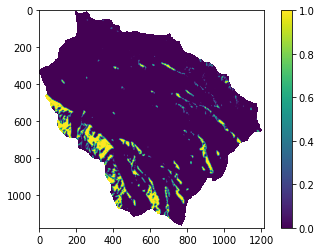

In [38]:
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();